## Machine Learning - Building Models

#### Case Study - Credit Card Payment

In [51]:
!pip install imblearn

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # to ignore warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

In [53]:
credit = pd.read_csv("UCI_Credit_Card.csv")
credit.shape

(15000, 25)

In [54]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
1,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
2,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
3,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
4,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [55]:
credit.drop(['ID'],axis=1, inplace=True)

In [56]:
credit.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [57]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.00000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,169527.578667,1.603933,1.855933,1.545200,35.508467,-0.030867,-0.138800,-0.176933,-0.229200,-0.273067,...,43118.445933,40351.464000,38825.088667,5780.55660,6.127210e+03,5307.791000,4965.934067,4903.425000,5266.527867,0.218867
std,130648.638294,0.489095,0.791467,0.520745,9.197418,1.122912,1.202954,1.197438,1.169141,1.127558,...,64329.094075,61109.614828,60034.459443,16549.96775,2.227448e+04,17651.918097,16584.273453,15621.695352,17953.612040,0.413492
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-53007.000000,-209051.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2303.000000,1759.000000,1248.000000,971.75000,8.352500e+02,392.000000,299.000000,266.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18944.000000,17934.000000,16587.000000,2100.00000,2.010000e+03,1823.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53963.250000,49944.000000,48739.750000,5020.25000,5.000000e+03,4500.000000,4040.000000,4077.500000,4100.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,493358.00000,1.227082e+06,896040.000000,497000.000000,426529.000000,527143.000000,1.000000


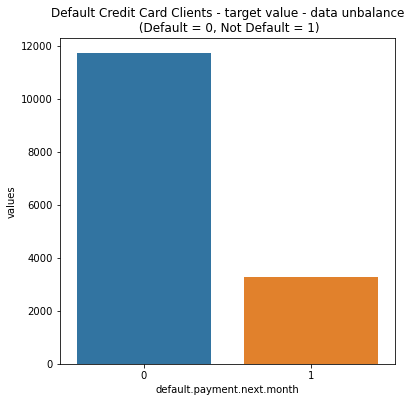

In [58]:
temp = credit['default.payment.next.month'].value_counts()
df = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize=(6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

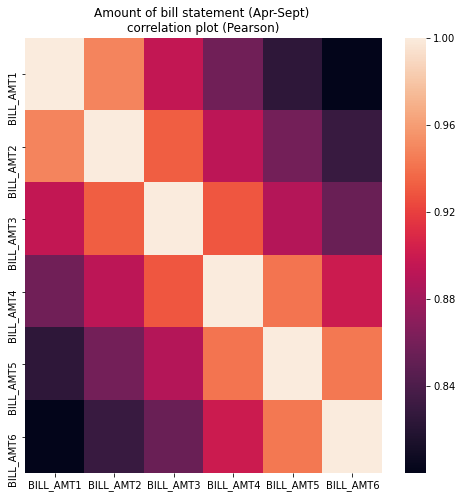

In [59]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
plt.figure(figsize=(8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = credit[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()

In [60]:
cat_features = ['EDUCATION', 'SEX', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

credit_dummies = pd.get_dummies(credit, columns=cat_features)

In [61]:
print("Default of Credit Card Clients train data -  rows:",credit_dummies.shape[0]," columns:", credit_dummies.shape[1])

Default of Credit Card Clients train data -  rows: 15000  columns: 90


In [62]:
target= 'default.payment.next.month'
predictors = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5',
       'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'SEX_1',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'PAY_0_-2',
       'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4',
       'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_2_-2', 'PAY_2_-1',
       'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5',
       'PAY_2_6', 'PAY_2_7', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6',
       'PAY_3_7', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1',
       'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7',
       'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3',
       'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_6_-2',
       'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5',
       'PAY_6_6', 'PAY_6_7']

In [63]:
#Assigning and dividing the dataset
X = credit_dummies[predictors]
y=credit_dummies['default.payment.next.month']

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)
X_train.shape

(12000, 80)

In [65]:
X_test.shape

(3000, 80)

## LogisticRegression

In [66]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')

In [67]:
#### Predicting on X_test dataset
y_pred = classifier.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.823667   0.683616  0.367223  0.477789


In [69]:
confusion_matrix(y_test,y_pred)

array([[2229,  112],
       [ 417,  242]], dtype=int64)

#### Applying SMOTE as data is unbalanced

In [70]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=589)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train,y_train)
print(len(y_SMOTE))

18752


In [71]:
classifier1 = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
classifier1.fit(X_SMOTE, y_SMOTE)

LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')

In [72]:
#### Predicting on X_test dataset
y_pred1 = classifier1.predict(X_test)

In [73]:
acc = accuracy_score(y_test, y_pred1)
prec = precision_score(y_test, y_pred1)
rec = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

model_results = pd.DataFrame([['Logistic Regression - with SMOTE', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.823667   0.683616  0.367223  0.477789
1  Logistic Regression - with SMOTE  0.564667   0.296413  0.714719  0.419039


In [74]:
confusion_matrix(y_test, y_pred1)

array([[1223, 1118],
       [ 188,  471]], dtype=int64)

## DecisionTree

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
clf = DecisionTreeClassifier(random_state=14) 
# training the classifier
clf.fit(X_train, y_train)
#Prediction
pred_dt = clf.predict(X_test)

In [77]:
# Predicting Test Set
acc = accuracy_score(y_test, pred_dt)
prec = precision_score(y_test, pred_dt)
rec = recall_score(y_test, pred_dt)
f1 = f1_score(y_test, pred_dt)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.823667   0.683616  0.367223  0.477789
1  Logistic Regression - with SMOTE  0.564667   0.296413  0.714719  0.419039
2                     Decision Tree  0.727000   0.383721  0.400607  0.391982


In [78]:
pd.DataFrame({'Actual_Values':y_test, 'Predicted_Values':pred_dt})

,Actual_Values,Predicted_Values
10644,0,1
13951,0,0
8082,0,0
10284,0,0
13473,1,1
...,...,...
1040,0,1
669,1,0
2729,0,0
9858,0,0


## Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

# Predicting Test Set
y_pred_rf = clf_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['Random Forest(Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.823667   0.683616  0.367223  0.477789
1  Logistic Regression - with SMOTE  0.564667   0.296413  0.714719  0.419039
2                     Decision Tree  0.727000   0.383721  0.400607  0.391982
3               Random Forest(Gini)  0.820000   0.662125  0.368741  0.473684


In [80]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(criterion='entropy')
clf_rf.fit(X_train, y_train)

# Predicting Test Set
y_pred_rf = clf_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['Random Forest(Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.823667   0.683616  0.367223  0.477789
1  Logistic Regression - with SMOTE  0.564667   0.296413  0.714719  0.419039
2                     Decision Tree  0.727000   0.383721  0.400607  0.391982
3               Random Forest(Gini)  0.820000   0.662125  0.368741  0.473684
4            Random Forest(Entropy)  0.819000   0.658470  0.365706  0.470244


In [81]:
result = pd.DataFrame({'features ': X_train.columns, 'score':clf_rf.feature_importances_.tolist()})
result.sort_values(by=['score'], ascending=False).head()

,features,score
0,LIMIT_BAL,0.069134
1,AGE,0.068150
2,BILL_AMT1,0.064581
3,BILL_AMT2,0.060799
4,BILL_AMT3,0.059169


## Apply SVM

In [82]:
from sklearn.svm import SVC

model_svm = SVC(cache_size=100)
model_svm.fit(X_train,y_train)
predicted = model_svm.predict(X_test)

In [83]:
acc = accuracy_score(y_test, predicted)
prec = precision_score(y_test, predicted,zero_division=True)
rec = recall_score(y_test, predicted,zero_division=True)
f1 = f1_score(y_test, predicted,zero_division=True)

model_results = pd.DataFrame([['Support Vector Machine', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.823667   0.683616  0.367223  0.477789
1  Logistic Regression - with SMOTE  0.564667   0.296413  0.714719  0.419039
2                     Decision Tree  0.727000   0.383721  0.400607  0.391982
3               Random Forest(Gini)  0.820000   0.662125  0.368741  0.473684
4            Random Forest(Entropy)  0.819000   0.658470  0.365706  0.470244
5            Support Vector Machine  0.780333   1.000000  0.000000  0.000000


### Apply KNN N=3

In [84]:
from sklearn.neighbors import KNeighborsClassifier

model_knn3 = KNeighborsClassifier(n_neighbors=3)
model_knn3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Apply KNN N=4

In [85]:
model_knn4 = KNeighborsClassifier(n_neighbors=4)
model_knn4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

### Apply KNN N=5

In [86]:
model_knn5 = KNeighborsClassifier(n_neighbors=5)
model_knn5.fit(X_train,y_train)

KNeighborsClassifier()

In [87]:
#Predicting Test set when n=3
pred_knn3 = model_knn3.predict(X_test)
acc = accuracy_score(y_test, pred_knn3)
prec = precision_score(y_test, pred_knn3)
rec = recall_score(y_test, pred_knn3)
f1 = f1_score(y_test, pred_knn3)

model_results = pd.DataFrame([['KNN-3 neigbours', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)


# Predicting Test Set N=4
pred_knn4= model_knn4.predict(X_test)
acc = accuracy_score(y_test, pred_knn4)
prec = precision_score(y_test, pred_knn4)
rec = recall_score(y_test, pred_knn4)
f1 = f1_score(y_test, pred_knn4)

model_results = pd.DataFrame([['KNN-4 neigbours', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)


# Predicting Test Set N=5
pred_knn5= model_knn5.predict(X_test)
acc = accuracy_score(y_test, pred_knn5)
prec = precision_score(y_test, pred_knn5)
rec = recall_score(y_test, pred_knn5)
f1 = f1_score(y_test, pred_knn5)

model_results = pd.DataFrame([['KNN-5 neigbours', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.823667   0.683616  0.367223  0.477789
1  Logistic Regression - with SMOTE  0.564667   0.296413  0.714719  0.419039
2                     Decision Tree  0.727000   0.383721  0.400607  0.391982
3               Random Forest(Gini)  0.820000   0.662125  0.368741  0.473684
4            Random Forest(Entropy)  0.819000   0.658470  0.365706  0.470244
5            Support Vector Machine  0.780333   1.000000  0.000000  0.000000
6                   KNN-3 neigbours  0.733000   0.330144  0.209408  0.256267
7                   KNN-4 neigbours  0.762333   0.344828  0.091047  0.144058
8                   KNN-5 neigbours  0.745333   0.325581  0.148710  0.204167


### Apply Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [89]:
# Predicting Test Set
pred_gnb = gnb.predict(X_test)
acc = accuracy_score(y_test, pred_gnb)
prec = precision_score(y_test, pred_gnb)
rec = recall_score(y_test, pred_gnb)
f1 = f1_score(y_test, pred_gnb)

model_results = pd.DataFrame([['Gaussian Naive Bayes', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.823667   0.683616  0.367223  0.477789
1  Logistic Regression - with SMOTE  0.564667   0.296413  0.714719  0.419039
2                     Decision Tree  0.727000   0.383721  0.400607  0.391982
3               Random Forest(Gini)  0.820000   0.662125  0.368741  0.473684
4            Random Forest(Entropy)  0.819000   0.658470  0.365706  0.470244
5            Support Vector Machine  0.780333   1.000000  0.000000  0.000000
6                   KNN-3 neigbours  0.733000   0.330144  0.209408  0.256267
7                   KNN-4 neigbours  0.762333   0.344828  0.091047  0.144058
8                   KNN-5 neigbours  0.745333   0.325581  0.148710  0.204167
9              Gaussian Naive Bayes  0.356333   0.245600  0.931715  0.388731


### Apply Bernoullie Naive Bayes

In [90]:
from sklearn.naive_bayes import BernoulliNB

model_nb = BernoulliNB()
model_nb.fit(X_train, y_train)

BernoulliNB()

In [91]:
# Predicting Test Set
pred_bnb = model_nb.predict(X_test)
acc = accuracy_score(y_test, pred_bnb)
prec = precision_score(y_test, pred_bnb)
rec = recall_score(y_test, pred_bnb)
f1 = f1_score(y_test, pred_bnb)

model_results = pd.DataFrame([['Bernoulli Naive Bayes', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                               Model  Accuracy  Precision    Recall  F1 Score
0                Logistic Regression  0.823667   0.683616  0.367223  0.477789
1   Logistic Regression - with SMOTE  0.564667   0.296413  0.714719  0.419039
2                      Decision Tree  0.727000   0.383721  0.400607  0.391982
3                Random Forest(Gini)  0.820000   0.662125  0.368741  0.473684
4             Random Forest(Entropy)  0.819000   0.658470  0.365706  0.470244
5             Support Vector Machine  0.780333   1.000000  0.000000  0.000000
6                    KNN-3 neigbours  0.733000   0.330144  0.209408  0.256267
7                    KNN-4 neigbours  0.762333   0.344828  0.091047  0.144058
8                    KNN-5 neigbours  0.745333   0.325581  0.148710  0.204167
9               Gaussian Naive Bayes  0.356333   0.245600  0.931715  0.388731
10             Bernoulli Naive Bayes  0.788333   0.519672  0.481032  0.499606


### Checking Best Metrics

#### Check Best Accuracy

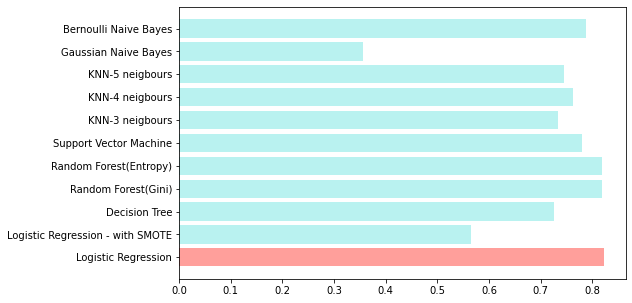

In [92]:
plt.figure(figsize=(8,5))
max_acc_index = results.Accuracy[results.Accuracy == results.Accuracy.max()].index[0]
plt.barh(results.Model, results.Accuracy, color='c')
plt.barh(results.Model[max_acc_index], results.Accuracy[max_acc_index], color='r')
plt.show()

#### Checking Best Recall

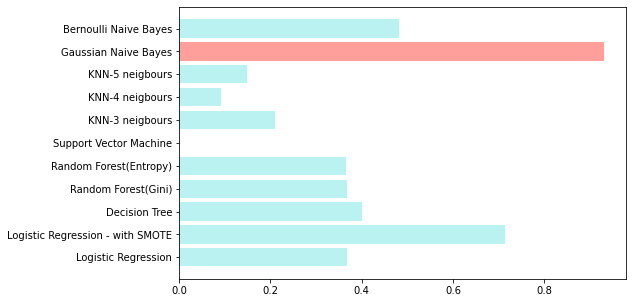

In [93]:
plt.figure(figsize=(8,5))
max_rec_index = results.Recall[results.Recall == results.Recall.max()].index[0]
plt.barh(results.Model, results.Recall, color='c')
plt.barh(results.Model[max_rec_index], results.Recall[max_rec_index], color='r')
plt.show()

#### Checking Best Precision

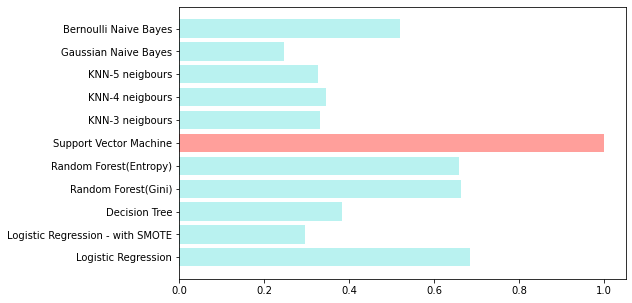

In [94]:
plt.figure(figsize=(8,5))
max_pre_index=results.Precision[results.Precision==results.Precision.max()].index[0]
plt.barh(results.Model,results.Precision,color='c')
plt.barh(results.Model[max_pre_index],results.Precision[max_pre_index],color='r')
plt.show()

#### Checking Best F1 Score

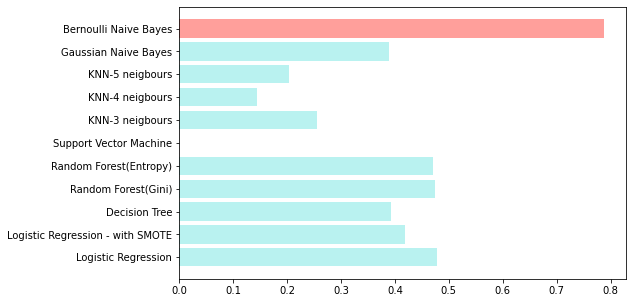

In [95]:
plt.figure(figsize=(8,5))
max_f1_index=results['F1 Score'][results['F1 Score']==results['F1 Score'].max()].index[0]
plt.barh(results.Model,results['F1 Score'],color='c')
plt.barh(results.Model[max_f1_index],results.Accuracy[max_f1_index],color='r')
plt.show()